## OCR of Hand-written Digits

5000 개의 필기 숫자 (각 숫자에 대해 500)가 있는 이미지 'digital.png' 제공 

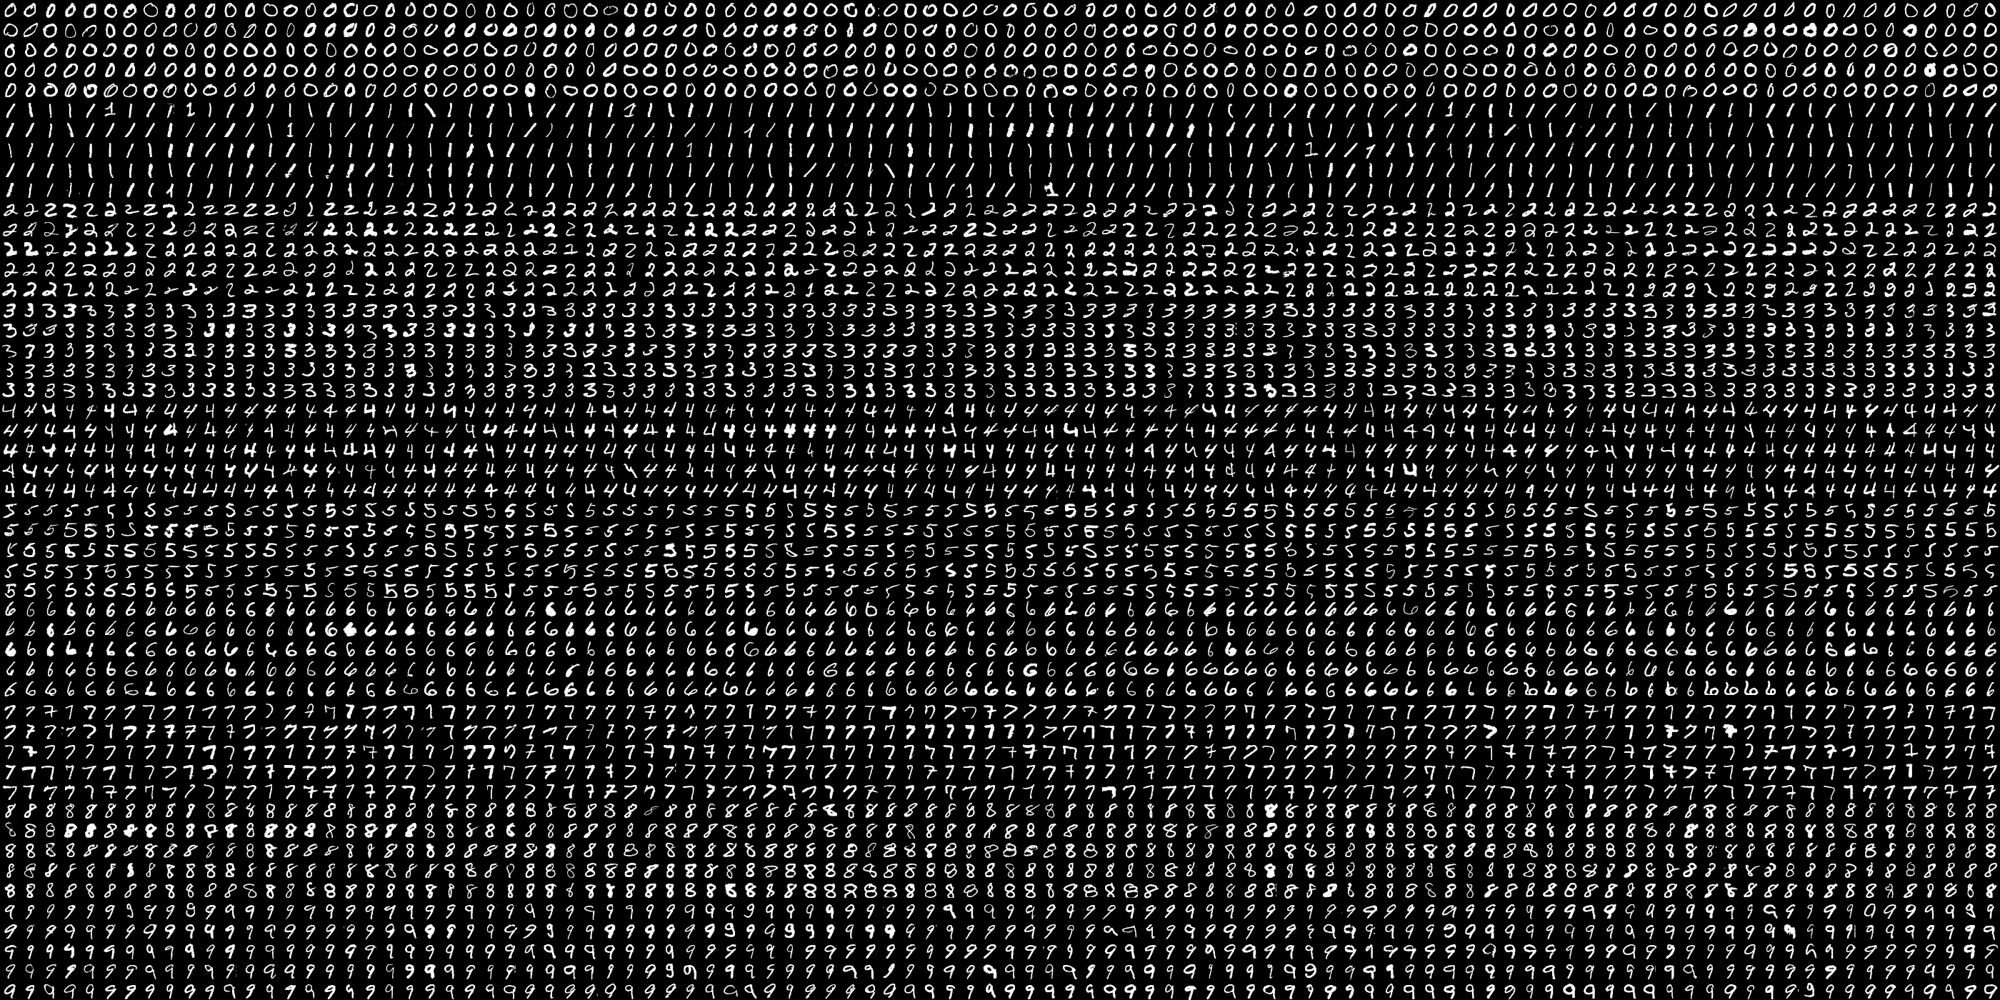


각 숫자는 20x20 이미지  
5000 개를 각 숫자 이미지로 분리하여 2500개씩 학습데이터와 테스트 데이터로 분리
knn으로 학습  
분류정확도 확인  

In [4]:
import numpy as np
import cv2 as cv

img = cv.imread('images/digits.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
print('gray.shape=', gray.shape)

# 5000 셀을 100개씩 50줄로 분리
# 각 셀은 20x20 
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Numpy array로 생성  (50,100,20,20)
x = np.array(cells)
print('x.shape=', x.shape)

#training data, test data 분리
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# train, test data의 라벨 생성
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]  #0-9, 250번 반복하여 값을 저장
test_labels = train_labels.copy()

# kNN 초기화
knn = cv.ml.KNearest_create()
#training data로 학습
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
#5-NN으로 test와 가까운 이웃에 대한 라벨을 결정
ret,result,neighbours,dist = knn.findNearest(test,k=5)

# 분류 정확도 확인
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

gray.shape= (1000, 2000)
x.shape= (50, 100, 20, 20)
91.76
